In [2]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

(7179, 30)
Index(['mut_id', 'md5', 'pmd_id', 'nr', 'prot_acc_version', 'snp_id',
       'mut_real', 'wt', 'mut', 'prot_pos', 'chrom', 'chrom_pos', 'ref_allele',
       'alt_allele', 'function', 'source', 'crossref', 'function_summarized',
       'class', 'SIFT_score', 'Polyphen2_HVAR_score', 'MetaRNN_score',
       'REVEL_score', 'MVP_score', 'CADD_raw_score',
       'integrated_fitCons_score', 'phyloP17way_primate_score',
       'phastCons17way_primate_score', 'bStatistic_score', 'pred'],
      dtype='object')


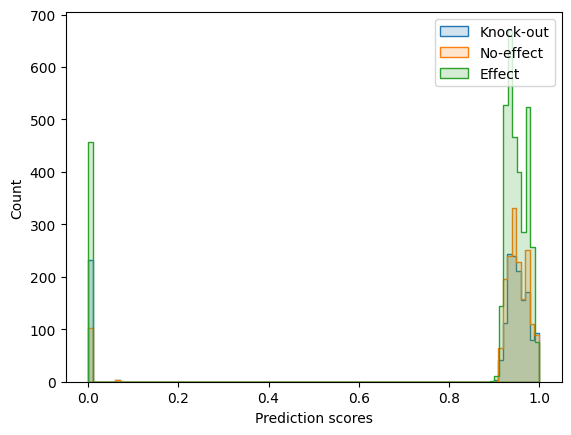

In [7]:
def plot_distribution(result_df, n_samples=None):
    df = result_df.copy(deep=True)
    plt.cla()

    effect = df[df["class"]=="Effect"]
    knock_out = df[df["class"]=="Knock-out"]
    no_effect = df[df["class"]=="No-effect"]

    if n_samples is not None:
        effect = effect.sample(n=n_samples)
        knock_out = knock_out.sample(n=n_samples)
        no_effect = no_effect.sample(n=n_samples)

    # print(effect.shape, knock_out.shape, no_effect.shape)
    bins = 100 # 20, 100, 500
    
    sns.histplot(knock_out["pred"], bins=bins, label=f"Knock-out", element="step", alpha=.2)
    sns.histplot(no_effect["pred"], bins=bins, label=f"No-effect", element="step", alpha=.2)
    sns.histplot(effect["pred"], bins=bins, label=f"Effect", element="step", alpha=.2)
    # sns.histplot(result_df, x="pred", y="class", element="step", hue="class", bins=bins, alpha=0.2)
    
    plt.legend()
    plt.xlabel("Prediction scores")
    plt.ylabel("Count")
    plt.show()

model_dir = "jax_unirep"
model_name = "unirep"
result_df = pd.read_csv(home_dir+f"models/{model_dir}/outputs/{model_name}/pmd/preds_{model_name}_embed.tsv", sep="\t")
model_pred_col = "pred"
result_df["pred"]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]
print(result_df.shape)
print(result_df.columns)
# result_df.rename(columns={"functional_effect": "class"}, inplace=True)
result_df["class"].value_counts()
plot_distribution(result_df, n_samples=None)